In [19]:
import os
os.getcwd()
os.listdir("../../../")

['.DS_Store',
 'requirements.txt',
 'uv.lock',
 'environment.yml',
 'references',
 'pyproject.toml',
 'README.md',
 '.gitignore',
 '.git',
 'data',
 'notebooks',
 'reports',
 'src']

# A. Assignment details

- What: Download, manipulate and merge two or more datasets from below
- How: Create functions in a python file to do this
- Show: Show how to use these python files in a notebook

## 1.1 Download data

In [20]:
import pandas as pd

# Data of "Share of population living in exrteme poverty" and "Terrorism deaths" imported from Our World in Data
poverty_file = "../../../data/raw/share-of-population-in-extreme-poverty.csv"
terrorism_file = "../../../data/raw/terrorism-deaths.csv"

# Data Sources
## poverty: https://ourworldindata.org/grapher/share-of-population-in-extreme-poverty
## terrorism: https://ourworldindata.org/grapher/terrorism-deaths

poverty_df = pd.read_csv(poverty_file)
terrorism_df = pd.read_csv(terrorism_file)

print("Poverty Columns:", poverty_df.columns)
print("Terrorism Columns:", terrorism_df.columns)

Poverty Columns: Index(['Entity', 'Code', 'Year',
       'Share of population living in extreme poverty (%)',
       '990305-annotations'],
      dtype='object')
Terrorism Columns: Index(['Entity', 'Code', 'Year', 'Terorrism deaths (deaths)'], dtype='object')


## 1.2 Manipulate Data

In [21]:
poverty_df = poverty_df[['Entity', 'Code', 'Year', 'Share of population living in extreme poverty (%)']]
terrorism_df = terrorism_df[['Entity', 'Code', 'Year', 'Terorrism deaths (deaths)']]

poverty_df = poverty_df.rename(columns={
    'Entity': 'country_name',
    'Code': 'country_code', 
    'Year': 'year',
    'Share of population living in extreme poverty (%)': 'extreme_poverty_percent'
})

terrorism_df = terrorism_df.rename(columns={
    'Entity': 'country_name',
    'Code': 'country_code', 
    'Year': 'year',
    'Terrorism deaths (deaths)': 'terrorism_deaths'
})

## 1.3 Merge Data

In [ ]:
merged_df = merged_df.dropna(subset=['extreme_poverty_percent', 'Terorrism deaths (deaths)'])

merged_df = merged_df.sort_values(by=["country_name", "year"], ascending=[True, False])
print("Filtered merged_df:\n", merged_df)

merged_df.to_csv("/Users/yujiuetsuki/Desktop/OWID_Poverty_Terrorism_Merged_filtered.csv", index=False)

Filtered merged_df:
       country_name country_code  year  extreme_poverty_percent  \
151        Albania          ALB  2020                 0.021277   
150        Albania          ALB  2019                 0.000000   
149        Albania          ALB  2018                 0.048107   
148        Albania          ALB  2017                 0.392570   
147        Albania          ALB  2016                 0.139303   
...            ...          ...   ...                      ...   
11089       Zambia          ZMB  1996                46.773384   
11084       Zambia          ZMB  1991                57.438600   
11164     Zimbabwe          ZWE  2019                39.754530   
11162     Zimbabwe          ZWE  2017                34.206043   
11156     Zimbabwe          ZWE  2011                21.580000   

       Terorrism deaths (deaths)  
151                          0.0  
150                          0.0  
149                          0.0  
148                          0.0  
147        

## 1.4 Descriptive Statistics

In [53]:
# 国コードがある＝Worldなどの集計行を除外
filtered_df = merged_df[merged_df['country_code'].notna()]
merged_df = merged_df[merged_df['country_name'] != 'World']

# 国数と期間
num_countries = filtered_df['country_name'].nunique()
print("Number of countries:", num_countries)

min_year = filtered_df['year'].min()
max_year = filtered_df['year'].max()
print(f"Time period: {min_year} to {max_year}")

# 記述統計量
desc_stats = filtered_df[['extreme_poverty_percent', 'Terorrism deaths (deaths)']].describe()
print("Descriptive Statistics:\n", desc_stats)

Number of countries: 155
Time period: 1970 to 2021
Descriptive Statistics:
        extreme_poverty_percent  Terorrism deaths (deaths)
count              2024.000000                2024.000000
mean                  9.183502                  43.334486
std                  17.178716                 243.055125
min                   0.000000                   0.000000
25%                   0.222527                   0.000000
50%                   0.999073                   0.000000
75%                   9.530355                   5.000000
max                  91.778530                5567.000000


## 1.4 Scatter Plot

Pearson correlation (log version, deaths > 0): 0.17


/var/folders/mn/flm_pxh500d49s9yf062k78w0000gn/T/ipykernel_37967/3516866572.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_df['log_terrorism_deaths'] = np.log(scatter_df['Terorrism deaths (deaths)'])


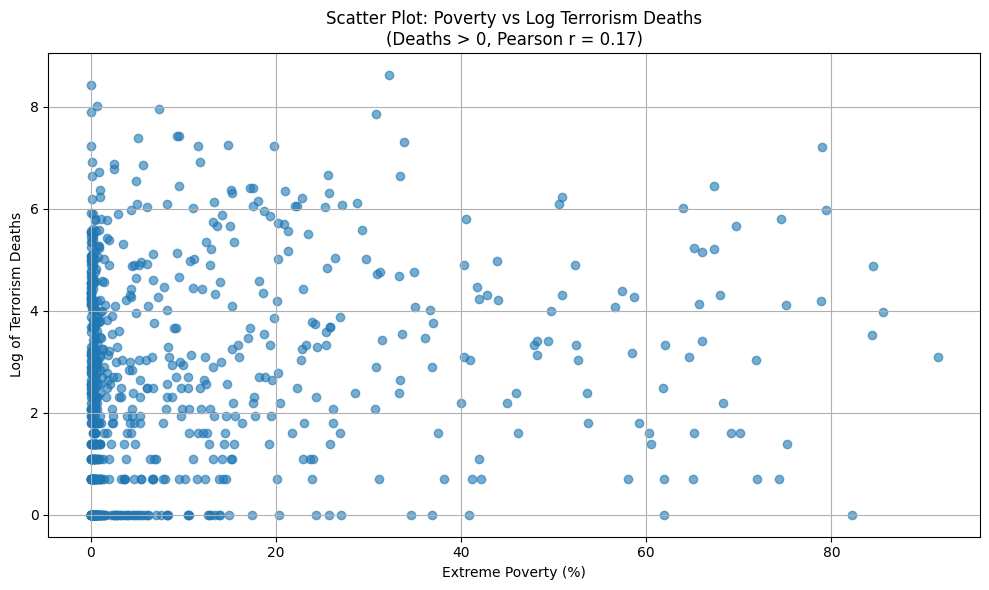

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# 
scatter_df = merged_df[
    (merged_df['extreme_poverty_percent'].notna()) &
    (merged_df['Terorrism deaths (deaths)'].notna()) &
    (merged_df['Terorrism deaths (deaths)'] > 0)
]

scatter_df['log_terrorism_deaths'] = np.log(scatter_df['Terorrism deaths (deaths)'])
corr_log = scatter_df[['extreme_poverty_percent', 'log_terrorism_deaths']].corr().iloc[0,1]
print(f"Pearson correlation (log version, deaths > 0): {corr_log:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['extreme_poverty_percent'], scatter_df['log_terrorism_deaths'], alpha=0.6)
plt.xlabel('Extreme Poverty (%)')
plt.ylabel('Log of Terrorism Deaths')
plt.title(f'Scatter Plot: Poverty vs Log Terrorism Deaths\n(Deaths > 0, Pearson r = {corr_log:.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()

Pearson correlation (Poverty ≥ 40%): 0.07
Pearson correlation (Poverty < 40%): 0.20


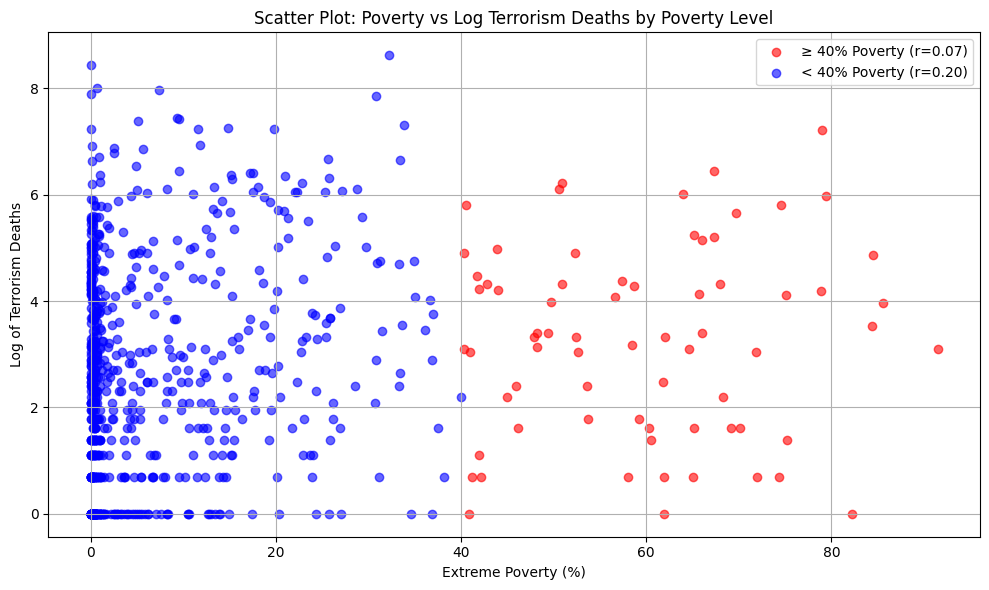

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# テロ死亡数と貧困率の欠損除去＋テロ死亡数が1以上（log可能なもの）に限定
scatter_df = merged_df[
    (merged_df['extreme_poverty_percent'].notna()) &
    (merged_df['Terorrism deaths (deaths)'].notna()) &
    (merged_df['Terorrism deaths (deaths)'] > 0)
].copy()

# log変換（+1不要、すでに0を除外している）
scatter_df['log_terrorism_deaths'] = np.log(scatter_df['Terorrism deaths (deaths)'])

# 40%以上・未満の2グループに分割
high_poverty = scatter_df[scatter_df['extreme_poverty_percent'] >= 40]
low_poverty = scatter_df[scatter_df['extreme_poverty_percent'] < 40]

# 相関係数の計算（任意）
corr_high = high_poverty[['extreme_poverty_percent', 'log_terrorism_deaths']].corr().iloc[0,1]
corr_low = low_poverty[['extreme_poverty_percent', 'log_terrorism_deaths']].corr().iloc[0,1]

print(f"Pearson correlation (Poverty ≥ 40%): {corr_high:.2f}")
print(f"Pearson correlation (Poverty < 40%): {corr_low:.2f}")

# 散布図の描画
plt.figure(figsize=(10, 6))
plt.scatter(high_poverty['extreme_poverty_percent'], high_poverty['log_terrorism_deaths'],
            color='red', alpha=0.6, label=f'≥ 40% Poverty (r={corr_high:.2f})')
plt.scatter(low_poverty['extreme_poverty_percent'], low_poverty['log_terrorism_deaths'],
            color='blue', alpha=0.6, label=f'< 40% Poverty (r={corr_low:.2f})')

plt.xlabel('Extreme Poverty (%)')
plt.ylabel('Log of Terrorism Deaths')
plt.title('Scatter Plot: Poverty vs Log Terrorism Deaths by Poverty Level')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

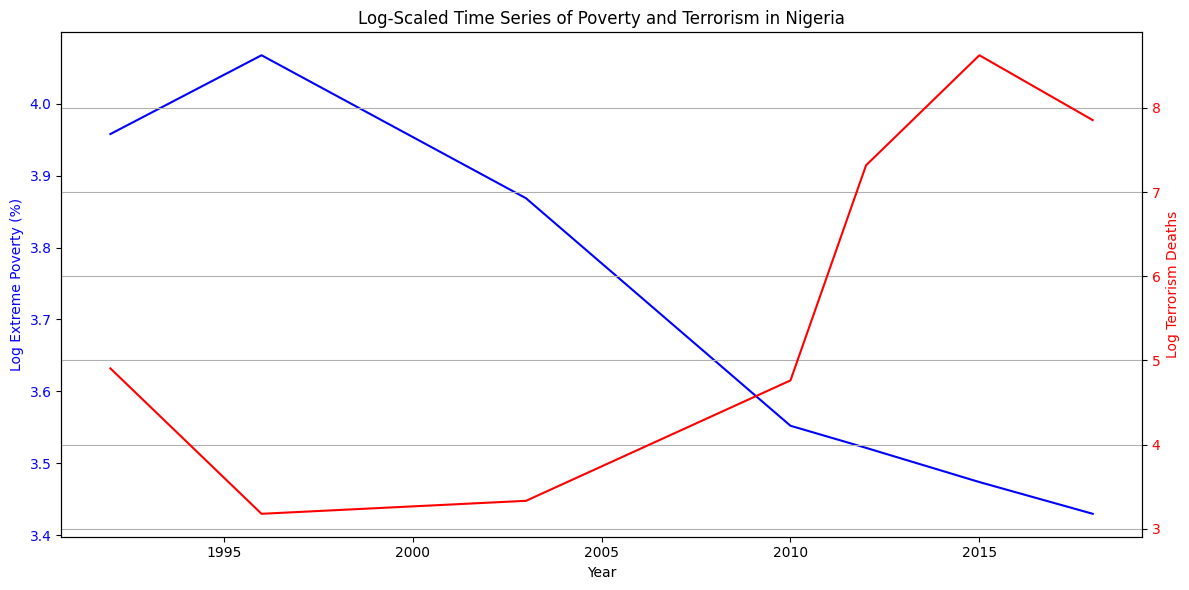

In [60]:
import numpy as np
import matplotlib.pyplot as plt

target_country = "Nigeria"
country_df = merged_df[
    (merged_df['country_name'] == target_country) &
    (merged_df['extreme_poverty_percent'].notna()) &
    (merged_df['Terorrism deaths (deaths)'].notna()) &
    (merged_df['Terorrism deaths (deaths)'] > 0) &  
    (merged_df['extreme_poverty_percent'] > 0)  
].sort_values('year').copy()

country_df['log_poverty'] = np.log(country_df['extreme_poverty_percent'])
country_df['log_terror'] = np.log(country_df['Terorrism deaths (deaths)'])

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(country_df['year'], country_df['log_poverty'], color='blue', label='Log Extreme Poverty')
ax1.set_xlabel('Year')
ax1.set_ylabel('Log Extreme Poverty (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(country_df['year'], country_df['log_terror'], color='red', label='Log Terrorism Deaths')
ax2.set_ylabel('Log Terrorism Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Log-Scaled Time Series of Poverty and Terrorism in {target_country}')
fig.tight_layout()
plt.grid(True)
plt.show()